# HW1: Bayesian Linear Regression


**STATS271/371: Applied Bayesian Statistics**

_Stanford University. Winter, 2021._

---

**Name:** Jake Taylor

**Names of any collaborators:** _Names here_

*Due: 11:59pm Friday, April 9, 2021 via GradeScope*

---

In this homework assignment you'll perform a Bayesian linear regression. As a quick recap of lecture, we have the following notation:

- Data:
 - $\mathbf{x}_n \in \mathbb{R}^P$ feature/covariates for the $n$-th datapoint
 - $y_n \in \mathbb{R}$ observation for the $n$-th datapoint
- Parameters:
 - $\mathbf{w} \in \mathbb{R}^P$  weights
 - $\sigma^2$ observation/noise variance
- Hyperparameters
 - $\nu, \tau^2$, degrees of freedom and scaling parameter of the inverse chi-squared prior on variance
 - $\boldsymbol{\mu} \in \mathbb{R}^P$ mean vector
 - $\mathbf{\Lambda} \in \mathbb{R}_{\succ 0}^{P \times P}$ positive definite precision matrix

The probabilistic model is as follows,
\begin{align}
p( \{y_n \}_{n=1}^N, \mathbf{w}, \sigma^2 \mid \{\mathbf{x}_n\}_{n=1}^N) 
&= p(\mathbf{w}, \sigma^2) \prod_{n=1}^N p(y_n \mid \mathbf{w}, \sigma^2, \mathbf{x}_n) \\
&= \mathrm{Inv-}\chi^2(\sigma^2 \mid \nu, \tau^2) \, \mathcal{N}(\mathbf{w} \mid \boldsymbol{\mu}, \sigma^2 \mathbf{\Lambda}^{-1}) 
\prod_{n=1}^N \mathcal{N}(y_n \mid \mathbf{w}^\top \mathbf{x}_n, \sigma^2).
\end{align}

Under this model, the posterior distribution $p(\mathbf{w}, \sigma^2 \mid \{y_n, \mathbf{x}_n\}_{n=1}^N)$ is available in closed form, as the prior is conjugate to the likelihood.

Follow the instructions below to compute the posterior distribution and perform the specified analyses. Specifically, we will be performing polynomial regression and recreating plots per the slides of **Lap 1: Bayesian Linear Regression**

In [1]:
!wget -nc https://raw.githubusercontent.com/slinderman/stats271sp2021/main/assignments/hw1.csv

File ‘hw1.csv’ already there; not retrieving.



In [2]:
import pandas as pd
df = pd.read_csv('hw1.csv')
df

,us,ys
0,1.764052,0.930890
1,0.400157,0.147197
2,0.978738,-0.123841
3,2.240893,1.397427
4,1.867558,0.440510
5,-0.977278,-3.253773
6,0.950088,0.276898
7,-0.151357,-0.719139
8,-0.103219,-1.474301
9,0.410598,0.545476


$\pagebreak$

## Problem 1: Plot the data

Recreate the plot from page 7 of the slides

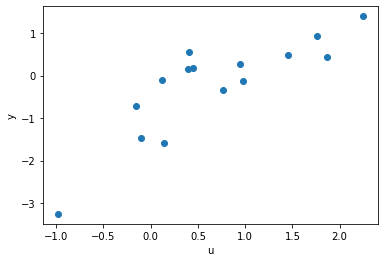

In [3]:
from matplotlib import pyplot as plt
plt.scatter(x=df.us, y=df.ys)
plt.xlabel("u")
plt.ylabel("y")
plt.show()

$\pagebreak$

## Problem 2: Compute and print the sufficient statistics of the data

Using covariates for a polynomial regression of degree 1 (letting the features $\mathbf{x}_n = (1, u_n)^\top$, calculate and print out the sufficient statistics (per slide 8).

In [4]:
# Polynomial Basis Expansion
def basis(x, power):
    x = np.array(x)
    n = len(x)
    X = np.ones((n, 1))
    for p in range(1, power+1):
        temp = np.power(x, p).reshape(n,1)
        X = np.hstack((X, temp))
    return X

In [5]:
import numpy as np
n, _ = df.shape
X = basis(df.us, 1)
y = np.array(df.ys).reshape(n, 1)
print(y.shape, X.shape)

(15, 1) (15, 2)


In [6]:
y_2 = np.sum(np.power(y, 2))
yx = np.sum(y * X, axis = 0)
xx = X.T.dot(X)
print(f"The sufficient statistics of the data are:")

The sufficient statistics of the data are:


$\sum_{n = 1}^N y_n^2$

In [7]:
print(f"{y_2}")

19.591393805106204


$\sum_{n = 1}^Ny_n \pmb x_n$

In [8]:
print(f"{yx}")

[-3.204591    9.74031843]


$\sum_{n = 1}^N\pmb x_n\pmb x_n^T$

In [9]:
print(f"{xx}")

[[15.         10.3051246 ]
 [10.3051246  17.72586162]]


$\pagebreak$

## Problem 3: Compute and print the posterior parameters $\nu'$, $\tau'^2$, $\boldsymbol{\mu}'$, and $\mathbf{\Lambda}'$

Assume that our prior parameters $\nu = \tau^2 = \boldsymbol{\mu} = \mathbf{\Lambda} = 0$. 

In [10]:
from numpy.linalg import inv
lambda_ = xx
nu_ = n
mu_ = inv(lambda_).dot(yx)
tau2_ = (1/nu_) * (y_2 - mu_.T.dot(lambda_).dot(mu_))

$\Lambda'$

In [11]:
print(f'{lambda_}')

[[15.         10.3051246 ]
 [10.3051246  17.72586162]]


$\nu'$

In [12]:
print(f'{nu_}')

15


$\mu'$

In [13]:
print(f'{mu_}')

[-0.98426349  1.12171001]


$\tau'^2$

In [14]:
print(f'{tau2_}')

0.36742794840057136


$\pagebreak$

## Problem 4a: Plot the posterior of $\sigma^2$

(Recreate the plot from slide 25)

$X \sim Scale-inv-\chi^2(\nu, \tau^2) \implies X \sim Inv-Gamma(\frac{\nu}{2}, \frac{\nu\tau^2}{2})$

In [15]:
from scipy.special import gamma

# Inverse Gamma Distribution
def inv_gamma(x, alpha, beta):
    return (np.power(alpha, beta) / gamma(alpha)) * np.power((1 / x), alpha + 1) * np.exp(-beta / x)

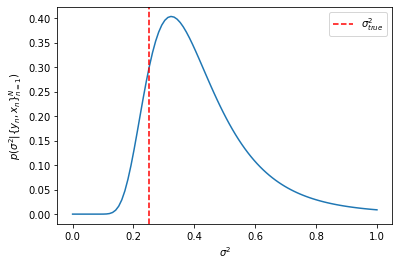

In [16]:
alpha = nu_ / 2
beta = nu_*tau2_ / 2
sigma = np.linspace(0.0001, 1, num=100)
pdf = inv_gamma(sigma, alpha, beta)
plt.plot(sigma, pdf)
plt.axvline(x=0.25, ls = '--', color='r', label = r'$\sigma_{true}^2$')
plt.ylabel(r"$p(\sigma^2|\{y_n, x_n\}_{n = 1}^N)$")
plt.xlabel(r"$\sigma^2$")
plt.legend()
plt.show()

$\pagebreak$

## Problem 4b: Plot the posterior of $\mathbf{w}$ for $\sigma^2 \in \{0.2, 0.4, 0.6\}$

(Recreate the figures from slide 26)


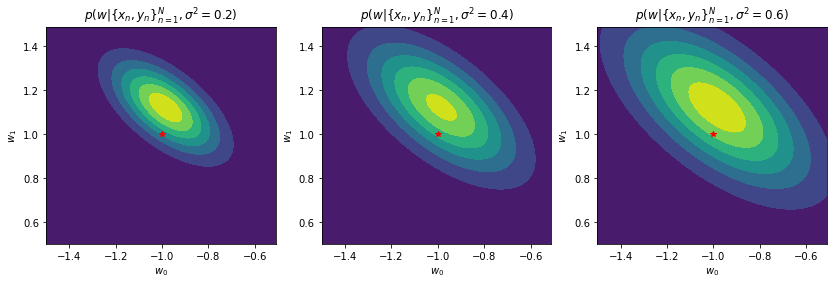

In [17]:
from scipy.stats import multivariate_normal
sigmas2 = [0.2, 0.4, 0.6]
w0, w1 = np.mgrid[-1.5:-0.5:.01, 0.5:1.5:.01]
pos = np.dstack((w0, w1))
fig, axs = plt.subplots(1, 3, figsize = (14, 4))

for ax, sigma2 in zip(axs, sigmas2):
    rv = multivariate_normal(mu_, sigma2 * inv(lambda_))
    ax.contourf(w0, w1, rv.pdf(pos))
    ax.plot(-1,1, marker='*', color = 'r')
    ax.set_title(r'$p(w|\{x_n, y_n\}_{n=1}^N, \sigma^2 = $' + f'{sigma2}' + ')')
    ax.set(xlabel=r'$w_0$', ylabel=r'$w_1$')

$\pagebreak$

## Problem 5: Compute the log marginal likelihood $p(\{y_n\} | \{\mathbf{x}_n\})$

Compare the log marginal likelihood with covariates $x_n = (u_n^0, \ldots, u_n^{P-1})$ for $P=0,\ldots,4$. Use the following prior parameters:
- $\nu = 0.01$
- $\tau^2 = 0.01$
- $\mathbf{\mu} = (0, \ldots, 0)^\top$
- $\mathbf{\Lambda} = 0.01 I$

To recapitulate the plot (slide 33) from lecture, divide the marginal likelihood by $N$ to get the average log marginal likelihood per datapoint.

In [18]:
from math import pi
from numpy.linalg import det

def marginal_likelihood(X, y):
    N, p = X.shape
    nu = 0.01 
    tau2 = 0.01
    mu = np.zeros(p)
    _lambda = 0.01 * np.identity(p)
    
    # Compute suff. statistics
    y_2 = np.sum(np.power(y, 2))
    yx = np.sum(y * X, axis = 0)
    xx = X.T.dot(X)
    
    # Update params
    lambda_ = _lambda + xx
    nu_ = nu + N
    mu_ = inv(lambda_).dot(_lambda.dot(mu) + yx)
    tau2_ = ((1/nu_) * (nu * tau2 
                        + mu.T.dot(_lambda).dot(mu) 
                        + y_2 
                        - mu_.T.dot(lambda_).dot(mu_)))
    
    # Marginal log likelihood
    num = np.log(gamma(nu_ / 2)) + nu * np.log(tau2 * nu / 2) / 2 + np.log(det(_lambda)) / 2
    denom = np.log(gamma(nu / 2)) + nu_ * np.log(tau2_ * nu_ / 2) / 2 + np.log(det(lambda_)) / 2
    return (-N * np.log(2 * pi) / 2 + num - denom) / N

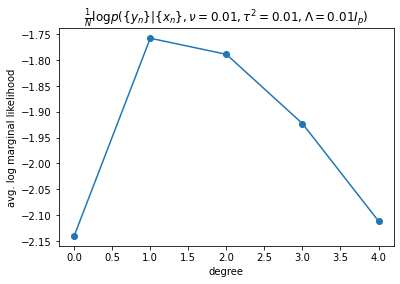

In [19]:
ll = []
for p in range(5):
    X = basis(df.us, p)
    ll.append(marginal_likelihood(X, y))
plt.plot(range(5), ll, marker='o')
plt.title(r'$\frac{1}{N}\log{p(\{y_n\}|\{x_n\}, \nu=0.01, \tau^2=0.01, \Lambda=0.01 I_p)}$')
plt.ylabel('avg. log marginal likelihood')
plt.xlabel('degree')
plt.show()

$\pagebreak$

# Submission Instructions


**Formatting:** check that your code does not exceed 80 characters in line width. If you're working in Colab, you can set _Tools &rarr; Settings &rarr; Editor &rarr; Vertical ruler column_ to 80 to see when you've exceeded the limit. 

Download your notebook in .ipynb format and use the following commands to convert it to PDF:
```
jupyter nbconvert --to pdf hw1_yourname.ipynb
```

**Dependencies:**

- `nbconvert`: If you're using Anaconda for package management, 
```
conda install -c anaconda nbconvert
```

**Upload** your .ipynb and .pdf files to Gradescope. 
